In [4]:
import numpy as np

## Семинар №4. Повторяем scikit-learn. Алгоритм k-NN.

На этом семинаре мы начнём изучать самую популярную библиотеку для машинного обучения, а именно scikit-learn.
Здесь написано огромное число базовых функций и алгоритмов. У них понятный интерфейс, поэтому использовать их очень просто.



### Об интерфейсе алгоритмов

Алгоритмы в sklearn'е — это  классы языка питон. У них могут быть методы:

**```fit(X_train, y_train)```** или **```fit(X_train)```**. 

Здесь ```X_train``` — это объекты обучающей выборки, то есть числовая матрица «объекты × признаки», а ```y_train``` — это вектор ответов. В методе ```fit``` происходит _обучение алгоритма_, то есть нахождение его _параметров_.

Алгоритмы обучения без учителя на вход получают только матрицу «объекты × признаки», а алгоритмы обучения с учителем ещё и ответы на этих объектах.

**```predict(X_test)```** — построение прогноза для тестовой выборки. Здесь ```X_test``` — это тоже матрица «объекты × признаки», но только уже для объектов тестовой выборки. 

Многие алгоритмы классификации умеют ещё и строить оценку вероятности принадлежности объекта заданному классу. Эти вероятности можно получить, вызвав **```predict_proba(X_test)```**.

Кроме алгоритмов классификации, регрессии и кластеризации в sklearn есть и другие: для предобработки данных, извлечения и отбора признаков или уменьшения признакового пространства. Для них вместо метода ```predict``` реализован метод **```transform(X)```**.

На работу алгоритма влияют две сущности:
* параметры, которые алгоритм настраивает сам,
* гиперпараметры, которые алгоритм не может настроить сам — ему нужно помочь. Гиперпараметры нужно определить при создании класса и передать в конструктор класса.

Давайте проверим, что всё работает. 

Сначала искусственно создадим данные (для задачи двухклассовой классификации):

In [5]:
X_train = np.array([
        [3, 9],
        [2, 8],
        [4, 8],
        [3, 7],
        [4, 7],
        [2, 6],
        [8, 3],
        [1, 8],
        [2, 7],
        [6, 3],
        [7, 2],
        [7, 3],
        [7, 4],
        [8, 5]])
y_train = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
X_test = np.array([
        [3, 8],
        [1, 7],
        [6, 2],
        [8, 4]])
y_test = np.array([1, 1, 0, 0])

... и нарисуем картинку:

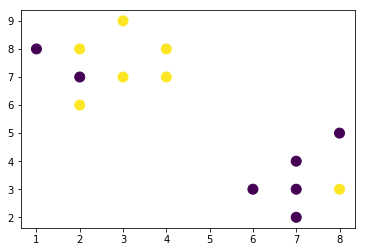

In [6]:
# Строчка, чтобы графики отображались в ноутбуке:
%matplotlib inline
# Вызов библиотеки:
import matplotlib.pyplot as plt

# Нарисуем точки из обучающей выборки:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, s=100)

Попробуйте сами ответить, как отработает алгоритм трёх ближайших соседей с евклидовой метрикой.

In [7]:
X_test = np.array([
        [3, 8],
        [1, 7],
        [6, 2],
        [8, 4]])

Теперь можно запускать классификатор. Чтобы найти, как называется и где лежит нужный алгоритм в sklearn'е, нужно просто погуглить. Запрос «k nearest neighbors classification scikit-learn» приведёт нас на [нужную страницу](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier). Можем импортировать алгоритм:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

Теперь создаём классификатор — объект класса KNeighborsClassifier. В круглых скобочках передаём гиперпараметры алгоритма. Значения гиперапараметров пока возьмём «с потолка»: ```metric='euclidean'``` и ```n_neighbors=3```.

In [9]:
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

Запускаем метод ```fit``` для обучения алгоритма:

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Теперь запускаем метод ```predict``` для получения ответа алгоритма на тестовой выборке:

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0])

Ура! Мы обучили первый классификатор! Вместо ```KNeighborsClassifier``` можно взять любой другой алгоритм классификации, поменяв в коде лишь названия и значения гиперпараметров.

Осталось измерить качество полученного алгоритма. Самый простой способ — посчитать долю правильных ответов. Для этого в ```sklearn.metrics``` есть функция ```accuracy_score```.

In [180]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=y_pred)

0.75

То же самое можно сделать в numpy так:

In [181]:
np.mean(y_test == y_pred) # По умолчанию True — это 1, а False — 0

0.75

### О разделении выборки на обучение и контроль

В реальной жизни часто нет готового разбиения всей выборки на обучающую и контрольную: есть только X и y — выборку надо разбить. Но перед этим её нужно случайно перемешать (почему?), а потом поделить в нужной пропорции.

В стародавние времена эту рутинную операцию нужно было писать своими руками, но теперь есть функция ```train_test_split``` из ```sklearn.model_selection```.

In [14]:
from sklearn.model_selection import train_test_split

# Склеим данные обратно:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

# Построим новое разбиение на обучение и контроль
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.3, random_state=42)

Здесь важно указывать ```random_state```, чтобы каждый раз генерировалась одинаковая последовательность псевдослучайных чисел.

### Кросс - валидация

In [15]:
from sklearn.model_selection import cross_val_score

In [18]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
np.mean(cross_val_score(knn, X, y, scoring = 'accuracy', cv=5))

0.75